In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [22]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [23]:
from citipy import citipy

In [24]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [29]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [30]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=83830aa4eb962bc7a7782eb9d9e5b172


In [26]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [33]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | sao filipe
Processing Record 6 of Set 1 | bakchar
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | aksu
Processing Record 11 of Set 1 | del rio
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | vieux-habitants
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | taoudenni
Processing Record 16 of Set 1 | mount isa
Processing Record 17 of Set 1 | marystown
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | narni
Processing Record 21 of Set 1 | tongeren
Processing Record 22 of Set 1 | upernavik
Processing Record 23 of Set 1 | port alfred
Processing Record 24 of Set 1 | hermanus
Processing Record 2

Processing Record 43 of Set 4 | alta floresta
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | cherskiy
Processing Record 46 of Set 4 | shingu
Processing Record 47 of Set 4 | praia
Processing Record 48 of Set 4 | chokurdakh
Processing Record 49 of Set 4 | corner brook
Processing Record 50 of Set 4 | plouzane
Processing Record 1 of Set 5 | niquelandia
Processing Record 2 of Set 5 | gazli
Processing Record 3 of Set 5 | saint-donat-de-montcalm
Processing Record 4 of Set 5 | marcona
City not found. Skipping...
Processing Record 5 of Set 5 | koundara
Processing Record 6 of Set 5 | monastyrshchina
Processing Record 7 of Set 5 | erzin
Processing Record 8 of Set 5 | vibo valentia
Processing Record 9 of Set 5 | zovuni
Processing Record 10 of Set 5 | khani
Processing Record 11 of Set 5 | dukat
Processing Record 12 of Set 5 | karasburg
Processing Record 13 of Set 5 | bathsheba
Processing Record 14 of Set 5 | tessalit
Processing Record 15 of Set 5 | waipawa
Processing Record 1

Processing Record 30 of Set 8 | pallasovka
Processing Record 31 of Set 8 | saleaula
City not found. Skipping...
Processing Record 32 of Set 8 | zheleznodorozhnyy
Processing Record 33 of Set 8 | sechura
Processing Record 34 of Set 8 | luau
Processing Record 35 of Set 8 | kui buri
Processing Record 36 of Set 8 | novobirilyussy
Processing Record 37 of Set 8 | ibra
Processing Record 38 of Set 8 | olafsvik
Processing Record 39 of Set 8 | brest
Processing Record 40 of Set 8 | lola
Processing Record 41 of Set 8 | inhambane
Processing Record 42 of Set 8 | medicine hat
Processing Record 43 of Set 8 | hobyo
Processing Record 44 of Set 8 | alyangula
Processing Record 45 of Set 8 | den helder
Processing Record 46 of Set 8 | zhigansk
Processing Record 47 of Set 8 | san carlos del zulia
Processing Record 48 of Set 8 | miyako
Processing Record 49 of Set 8 | san cristobal
Processing Record 50 of Set 8 | izumo
Processing Record 1 of Set 9 | boa vista
Processing Record 2 of Set 9 | melo
Processing Recor

City not found. Skipping...
Processing Record 18 of Set 12 | pontianak
Processing Record 19 of Set 12 | andevoranto
City not found. Skipping...
Processing Record 20 of Set 12 | prince rupert
Processing Record 21 of Set 12 | gorontalo
Processing Record 22 of Set 12 | sisimiut
Processing Record 23 of Set 12 | palana
Processing Record 24 of Set 12 | nerchinskiy zavod
Processing Record 25 of Set 12 | ulaangom
Processing Record 26 of Set 12 | ust-nera
Processing Record 27 of Set 12 | thinadhoo
Processing Record 28 of Set 12 | fort wellington
Processing Record 29 of Set 12 | nongstoin
Processing Record 30 of Set 12 | ahuimanu
Processing Record 31 of Set 12 | navahrudak
Processing Record 32 of Set 12 | halalo
City not found. Skipping...
Processing Record 33 of Set 12 | odesskoye
Processing Record 34 of Set 12 | inirida
Processing Record 35 of Set 12 | sioux lookout
Processing Record 36 of Set 12 | nogliki
Processing Record 37 of Set 12 | saint-francois
Processing Record 38 of Set 12 | tecolut

In [35]:
len(city_data)

550

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,46.92,100,90,6.91,CA,2021-09-23 05:15:06
1,Georgetown,5.4112,100.3354,89.55,55,20,8.05,MY,2021-09-23 05:15:34
2,Atuona,-9.8000,-139.0333,77.59,81,14,19.13,PF,2021-09-23 05:15:35
3,Ribeira Grande,38.5167,-28.7000,70.79,72,13,10.02,PT,2021-09-23 05:15:35
4,Sao Filipe,14.8961,-24.4956,78.53,78,37,8.99,CV,2021-09-23 05:15:36
5,Bakchar,57.0186,82.0711,38.50,75,81,5.37,RU,2021-09-23 05:15:36
6,Jamestown,42.0970,-79.2353,65.79,69,90,7.00,US,2021-09-23 05:15:37
7,Albany,42.6001,-73.9662,72.45,85,85,11.21,US,2021-09-23 05:15:37
8,Bredasdorp,-34.5322,20.0403,45.72,87,52,2.30,ZA,2021-09-23 05:15:38
9,Aksu,41.1231,80.2644,76.77,22,10,9.75,CN,2021-09-23 05:15:38


In [37]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness",
                            "Wind Speed"]

In [38]:
city_data_df = city_data_df[new_column_order]

In [39]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-09-23 05:15:06,62.4560,-114.3525,46.92,100,90,6.91
1,Georgetown,MY,2021-09-23 05:15:34,5.4112,100.3354,89.55,55,20,8.05
2,Atuona,PF,2021-09-23 05:15:35,-9.8000,-139.0333,77.59,81,14,19.13
3,Ribeira Grande,PT,2021-09-23 05:15:35,38.5167,-28.7000,70.79,72,13,10.02
4,Sao Filipe,CV,2021-09-23 05:15:36,14.8961,-24.4956,78.53,78,37,8.99
...,...,...,...,...,...,...,...,...,...
545,Rorvik,NO,2021-09-23 05:19:52,64.8621,11.2373,48.31,87,40,8.05
546,Jasrana,IN,2021-09-23 05:19:14,27.2500,78.6833,86.77,62,88,9.62
547,Kendari,ID,2021-09-23 05:19:52,-3.9450,122.4989,74.19,95,100,3.00
548,Cabo San Lucas,MX,2021-09-23 05:19:53,22.8909,-109.9124,85.51,78,63,8.79


In [43]:
# Create the output file (CSV).
output_data_file = "../World_Weather_Analysis/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [45]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1632588560.809597

In [46]:
today = time.strftime("%x")
today

'09/25/21'

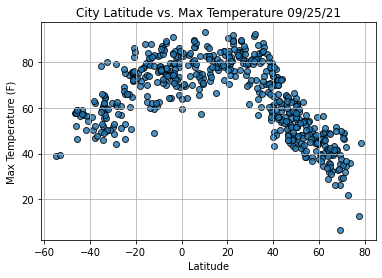

In [48]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../World_Weather_Analysis/Fig1.png")

# Show plot.
plt.show()

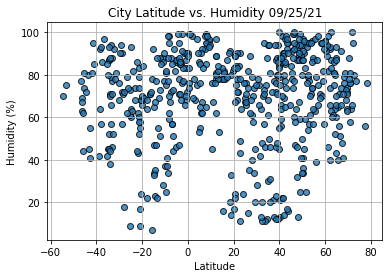

In [50]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../World_Weather_Analysis/Fig2.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../W/Fig3.png")
# Show plot.
plt.show()